In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [20]:
'''
Written by Chad Valencia, chadvalencia@gmail.com for Codecademy

Data derived from the StreetEasy dataset.

To have this notebook function properly, move 
the manhattan csv to the data folder.

Extra credit to:
Richard Lewis for added features
'''

'\nWritten by Chad Valencia, chadvalencia@gmail.com for Codecademy\n\nData derived from the StreetEasy dataset.\n\nTo have this notebook function properly, move the manhattan csv from the site to the data folder.\n\nExtra credit to:\nRichard Lewis for added features\n'

In [21]:
streeteasy = pd.read_csv("data/manhattan.csv")

df = pd.DataFrame(streeteasy)

df.head()

FileNotFoundError: File b'data/manhattan.csv' does not exist

In [ ]:
df.describe()

In [9]:
# from Richard Lewis's code:
# square feet per room feature -- take square footage and divide it by the number of bedrooms and bathrooms
df["sqft_per_room"] = df.apply(lambda row: (row.size_sqft // (row.bedrooms + row.bathrooms)) if row.bedrooms > 0 and row.bathrooms > 0 else row.size_sqft, axis=1)

# elevator to high floors feature -- you may not care about an elevator if your apartment is on the 2nd floor...you certainly do care if your apartment is on the 23rd
df["elev_to_high_floor"] = df.apply(lambda row: 1 if row.floor >= 4 and row.has_elevator == 1 else 0, axis=1)

# is luxury feature...if a building is newish and has a roof deck and a doorman, it's a luxury building ¯\_(ツ)_/¯
df['is_luxury'] = df.apply(lambda row: 1 if row.building_age_yrs < 20 and row.has_roofdeck == 1 and row.has_doorman == 1 else 0, axis=1)

In [10]:
#slicing by borough
print(df.neighborhood.unique())

def part_of_town(hood):
    if hood in ['Upper East Side', 'Upper West Side','Central Harlem','West Harlem','Manhattanville','Inwood','Hamilton Heights','Morningside Heights','Washington Heights']:
        return 'Upper Manhattan'
    elif hood in ['Midtown','Midtown East','Midtown West', 'Long Island City','Flatiron','Gramercy Park','Stuyvesant Town/PCV','Roosevelt Island','Chelsea',]:
        return 'Midtown Manhattan'
    else:
        return 'Lower Manhattan'
    
df['part_of_town']=df.apply(lambda row: part_of_town(row['neighborhood']),axis =1)
df.head(5)

['Upper East Side' 'Greenwich Village' 'Midtown' 'Soho' 'Central Harlem'
 'Midtown East' 'Battery Park City' 'Flatiron' 'East Village'
 'Midtown West' 'Upper West Side' 'Lower East Side' 'Tribeca'
 'Gramercy Park' 'East Harlem' 'West Village' 'Central Park South'
 'Chelsea' 'Financial District' 'Inwood' 'Midtown South'
 'Washington Heights' 'Chinatown' 'Roosevelt Island' 'Hamilton Heights'
 'Stuyvesant Town/PCV' 'Morningside Heights' 'Little Italy' 'Nolita'
 'West Harlem' 'Long Island City' 'Manhattanville']


,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,...,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough,sqft_per_room,elev_to_high_floor,is_luxury,part_of_town
0,1545,2550,0.0,1,480,9,2.0,17,1,1,...,1,1,0,1,Upper East Side,Manhattan,480.0,0,0,Upper Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,...,0,0,0,0,Greenwich Village,Manhattan,500.0,0,0,Lower Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,...,1,1,0,0,Midtown,Manhattan,458.0,1,0,Midtown Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,...,1,1,0,1,Greenwich Village,Manhattan,487.0,1,0,Lower Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,...,1,1,0,1,Soho,Manhattan,1200.0,1,0,Lower Manhattan


In [11]:
df = pd.concat([df,pd.get_dummies(df['part_of_town'],prefix='part of')],axis=1)

In [12]:
df.head(5)

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,...,has_gym,neighborhood,borough,sqft_per_room,elev_to_high_floor,is_luxury,part_of_town,part of_Lower Manhattan,part of_Midtown Manhattan,part of_Upper Manhattan
0,1545,2550,0.0,1,480,9,2.0,17,1,1,...,1,Upper East Side,Manhattan,480.0,0,0,Upper Manhattan,0,0,1
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,...,0,Greenwich Village,Manhattan,500.0,0,0,Lower Manhattan,1,0,0
2,2919,4500,1.0,1,916,2,51.0,29,0,1,...,0,Midtown,Manhattan,458.0,1,0,Midtown Manhattan,0,1,0
3,2790,4795,1.0,1,975,3,8.0,31,0,0,...,1,Greenwich Village,Manhattan,487.0,1,0,Lower Manhattan,1,0,0
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,...,1,Soho,Manhattan,1200.0,1,0,Lower Manhattan,1,0,0


In [13]:
x = df[['bedrooms','bathrooms','size_sqft','floor', 'building_age_yrs', 'is_luxury', 'elev_to_high_floor', 'sqft_per_room', 'has_dishwasher', 'has_gym', 'part of_Lower Manhattan', 'part of_Midtown Manhattan']]
# add ", 'part of_Lower Manhattan', 'part of_Midtown Manhattan'" to x
y = df[['rent']]

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


Train score:
0.776260811453884
Test score:
0.8164392521112268


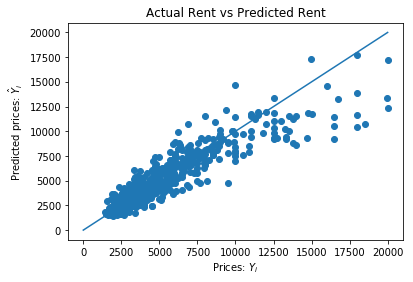

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

lm = LinearRegression()

model = lm.fit(x_train, y_train)

y_predict= lm.predict(x_test)

print("Train score:")
print(lm.score(x_train, y_train))

print("Test score:")
print(lm.score(x_test, y_test))

plt.scatter(y_test, y_predict)
plt.plot(range(20000), range(20000))

plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Rent vs Predicted Rent")

plt.show()